In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os
import matplotlib.pyplot as plt

In [2]:
from torchvision.datasets import ImageFolder

In [3]:
data_dir = r"C:\Users\hfwal\Downloads\ecommerce products"
print(os.listdir(data_dir))

['jeans', 'sofa', 'tshirt', 'tv']


In [4]:
import matplotlib.image as mpimg


In [5]:
#paths to each directory
jeans_dir = r"C:\Users\hfwal\Downloads\ecommerce products\tshirt"
sofa_dir = r"C:\Users\hfwal\Downloads\ecommerce products\sofa"
tshirt_dir =  r"C:\Users\hfwal\Downloads\ecommerce products\tshirt"
tv_dir = r"C:\Users\hfwal\Downloads\ecommerce products\tv"

In [6]:
# Getting file names for each directory
jeans = os.listdir(jeans_dir)
sofa = os.listdir(sofa_dir)
tshirt = os.listdir(tshirt_dir)
tv = os.listdir(tv_dir)

In [7]:
nrows = 4
ncols = 8
plt.figure(figsize = (ncols*4,nrows*4))
pic_index = 0

<Figure size 3200x1600 with 0 Axes>

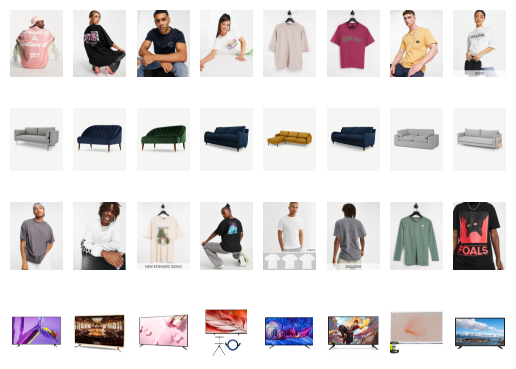

In [8]:
img_categories = [jeans_dir,sofa_dir,tshirt_dir,tv_dir]
for category in img_categories :
    new_pix = [os.path.join(category,fname) for fname in os.listdir(category)[pic_index:pic_index+ncols]]
    for i, img_path in enumerate(new_pix):
        plt.subplot(nrows,ncols,pic_index + i+ 1)
        plt.axis('Off')
        img = mpimg.imread(img_path)
        plt.imshow(img)
    pic_index += ncols
plt.show()

In [9]:
#Image dimensions :
img_ht = 150
img_wth = 150
batch_size = 50
num_epochs = 20

In [10]:
# Conducting data augmentation and creating a split for validation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(rescale = 1./255,
                               shear_range=0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               validation_split = 0.2)


In [11]:
# Conducting data augmentation and creating a split for validation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(rescale = 1./255,
                               shear_range=0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               validation_split = 0.2)
#training data
training_data_generator = generator.flow_from_directory(data_dir,
                                                       target_size = (img_ht,img_wth),
                                                       batch_size=batch_size,
                                                       class_mode = 'categorical',
                                                       subset= 'training'
                                                       )
#validation generator 
val_data_generator = generator.flow_from_directory(data_dir,
                                                       target_size = (img_ht,img_wth),
                                                       batch_size=batch_size,
                                                       class_mode = 'categorical',
                                                       subset = 'validation'
                                                       )

Found 640 images belonging to 4 classes.
Found 156 images belonging to 4 classes.


In [12]:
# Defining the neural network model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu',input_shape=(img_ht,img_wth,3)),
    MaxPooling2D(3,3),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64,activation='relu'),
    Dense(4,activation='softmax')    
])

In [13]:
#Adding opimization parameters
model.compile(optimizer= 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
#Model training
history = model.fit(training_data_generator,epochs = num_epochs,validation_data = val_data_generator)

Epoch 1/20


13/13 [==============================] - 35s 3s/step - loss: 1.5732 - accuracy: 0.3891 - val_loss: 0.9475 - val_accuracy: 0.6282
Epoch 2/20
13/13 [==============================] - 32s 3s/step - loss: 0.7236 - accuracy: 0.7906 - val_loss: 0.4941 - val_accuracy: 0.8462
Epoch 3/20
13/13 [==============================] - 30s 2s/step - loss: 0.4911 - accuracy: 0.8438 - val_loss: 0.4089 - val_accuracy: 0.8462
Epoch 4/20
13/13 [==============================] - 32s 3s/step - loss: 0.4146 - accuracy: 0.8625 - val_loss: 0.3160 - val_accuracy: 0.8910
Epoch 5/20
13/13 [==============================] - 36s 3s/step - loss: 0.2972 - accuracy: 0.9094 - val_loss: 0.2154 - val_accuracy: 0.9423
Epoch 6/20
13/13 [==============================] - 32s 2s/step - loss: 0.2695 - accuracy: 0.9156 - val_loss: 0.1647 - val_accuracy: 0.9487
Epoch 7/20
13/13 [==============================] - 31s 2s/step - loss: 0.2581 - accuracy: 0.9187 - val_loss: 0.2270 - val_accuracy: 0.9359
Epoch 8/20
13/13 [

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 64)                2

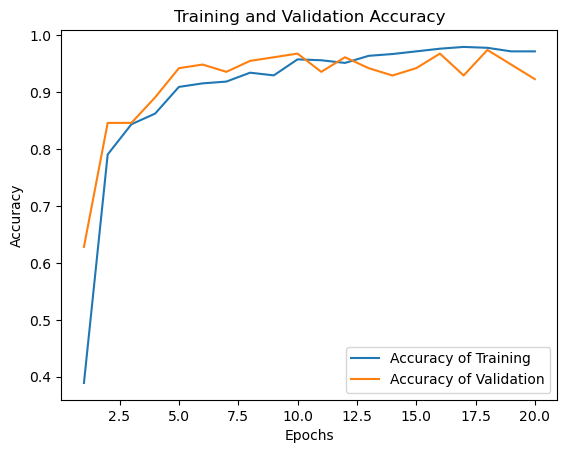

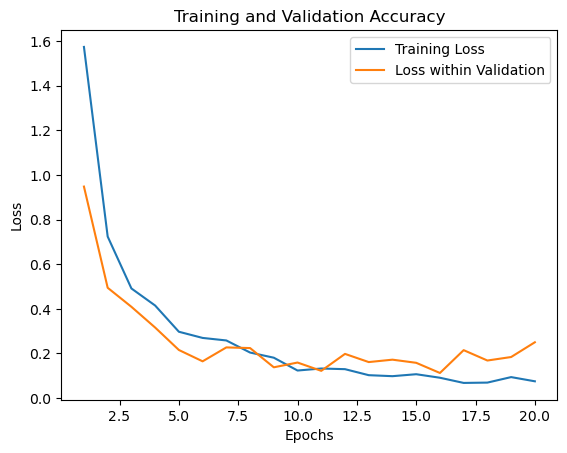

In [16]:
#Plotting the training and validation loss
accuracy = history.history['accuracy']
val_accu = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy)+1)

plt.plot(epochs, accuracy, label='Accuracy of Training')
plt.plot(epochs,val_accu, label='Accuracy of Validation')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs,val_loss, label='Loss within Validation')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 [==============================] - 1s 805ms/step
Predicted class: jeans


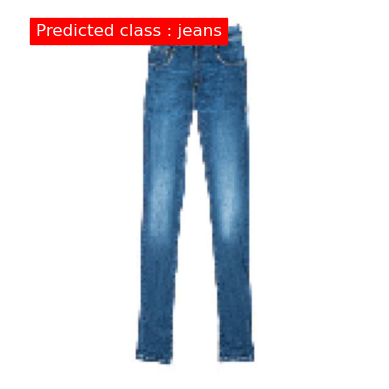

In [17]:
#Testing using new data
from tensorflow.keras.preprocessing import image
import numpy as np
new_image = r"C:\Users\hfwal\Downloads\jeans test.jpg"
img = image.load_img(new_image,target_size=(img_ht,img_wth))
img_array = image.img_to_array(img)
img_array =np.expand_dims(img_array,axis=0)
img_array = img_array/255.0

predict = model.predict(img_array)
pred_index = np.argmax(predict,axis=1)
class_names = ['jeans','tv','sofa','tshirt']
predicted_name = class_names[np.argmax(predict)]
print("Predicted class:", predicted_name)

plt.imshow(img)
plt.axis('off')
plt.text(10,10,f'Predicted class : {predicted_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()